In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.skybrightness_pre as sb
import healpy as hp
import lsst.sims.skybrightness as sb1

In [2]:
sm = sb.SkyModelPre(opsimFields=True)

In [3]:
sm.returnMags(59652.34082176, np.array([3187]), extrapolate=True)


{'g': array([ 21.74522706]),
 'i': array([ 19.65397163]),
 'r': array([ 20.6424568]),
 'u': array([ 22.60189416]),
 'y': array([ 17.45606289]),
 'z': array([ 18.66115705])}

In [4]:
sm.returnMags(59652.34082176, np.array([3187]), apply_mask=False, extrapolate=True)

{'g': array([ 21.74522706]),
 'i': array([ 19.65397163]),
 'r': array([ 20.6424568]),
 'u': array([ 22.60189416]),
 'y': array([ 17.45606289]),
 'z': array([ 18.66115705])}

In [5]:
mjd = 59580.10837963
fieldID = 1242
sm.returnMags(mjd, np.array([1242]), badval=float('nan'), extrapolate=True, planet_mask=False)

{'g': array([ 22.36274895]),
 'i': array([ 20.41938414]),
 'r': array([ 21.34328431]),
 'u': array([ 22.86387056]),
 'y': array([ 18.23516016]),
 'z': array([ 19.44268305])}

In [6]:
sm.returnMags(mjd, np.array([1242]), apply_mask=False,  planet_mask=False)

{'g': array([ 22.36274895]),
 'i': array([ 20.41938414]),
 'r': array([ 21.34328431]),
 'u': array([ 22.86387056]),
 'y': array([ 18.23516016]),
 'z': array([ 19.44268305])}

In [7]:
sm.info['mjds'][0:80]
mjd_between = 59561.5
sm.returnMags(mjd_between, planet_mask=False)

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:247: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')


{'g': array([  1.95963089e+01,   1.96881846e+01,   1.94309463e+01, ...,
         -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30]),
 'i': array([  1.85301448e+01,   1.86160356e+01,   1.83794486e+01, ...,
         -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30]),
 'r': array([  1.95907448e+01,   1.96725692e+01,   1.94434540e+01, ...,
         -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30]),
 'u': array([  1.93217654e+01,   1.94178833e+01,   1.91499413e+01, ...,
         -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30]),
 'y': array([  1.63870386e+01,   1.64723395e+01,   1.62411563e+01, ...,
         -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30]),
 'z': array([  1.75607685e+01,   1.76463103e+01,   1.74135136e+01, ...,
         -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30])}

In [8]:
sm.sb['r'][np.array(100), :][0]

20.700082563751351

In [9]:
np.degrees(np.arccos(1./sm.returnAirmass(mjd, indx=np.array([1242]))))

array([ 4.32910621])

In [10]:
sm.returnAirmass(mjd, indx=np.array([1242]))

array([ 1.00286125])

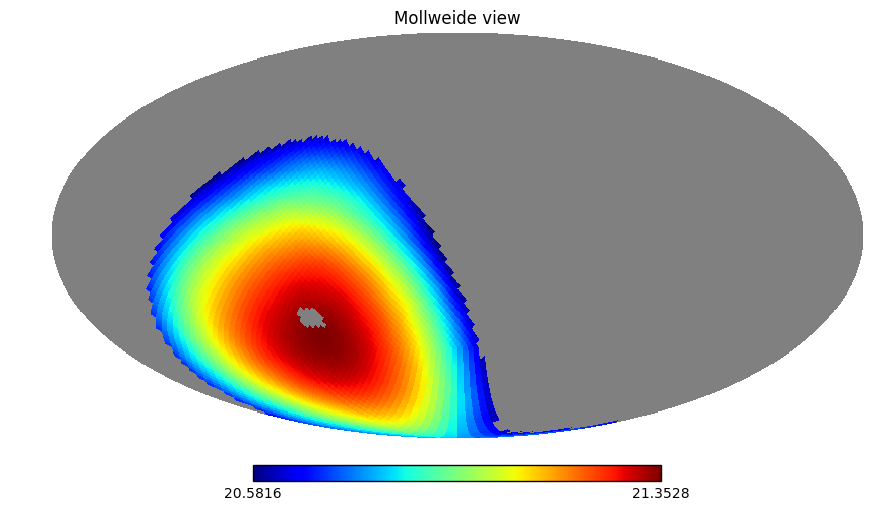

In [11]:
sm = sb.SkyModelPre()
mags = sm.returnMags(59580.10837963)
hp.mollview(mags['r'])

In [12]:
sm = sb.SkyModelPre(preload=False)

In [13]:
mjd = 60364.0208333333#59760. #60364.0208333333
ra = 60.217225
dec = 29.40758

In [14]:
mags = sm.returnMags(mjd)

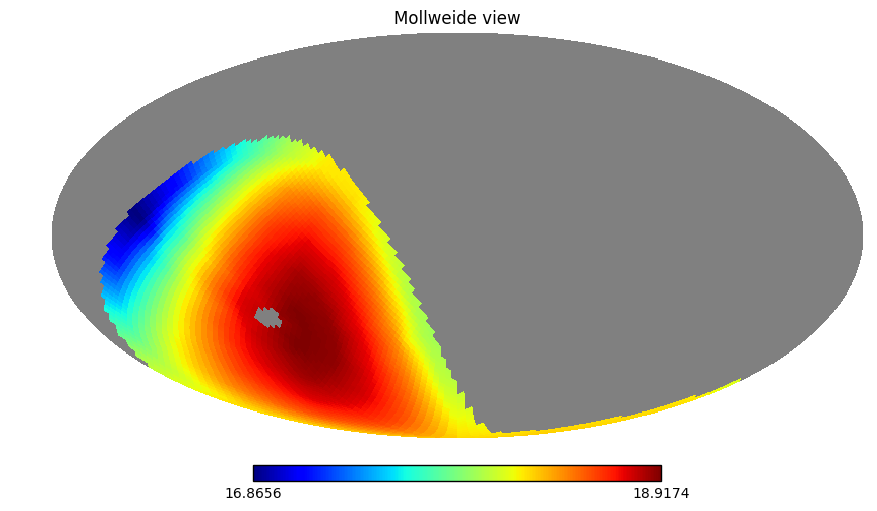

In [15]:
hp.mollview(mags['r'])

In [16]:
airmasses = sm.returnAirmass(mjd)
good = np.where((airmasses > 2.8) & (airmasses < 4.))
outliers = sm.returnMags(mjd, indx=good, extrapolate=True)


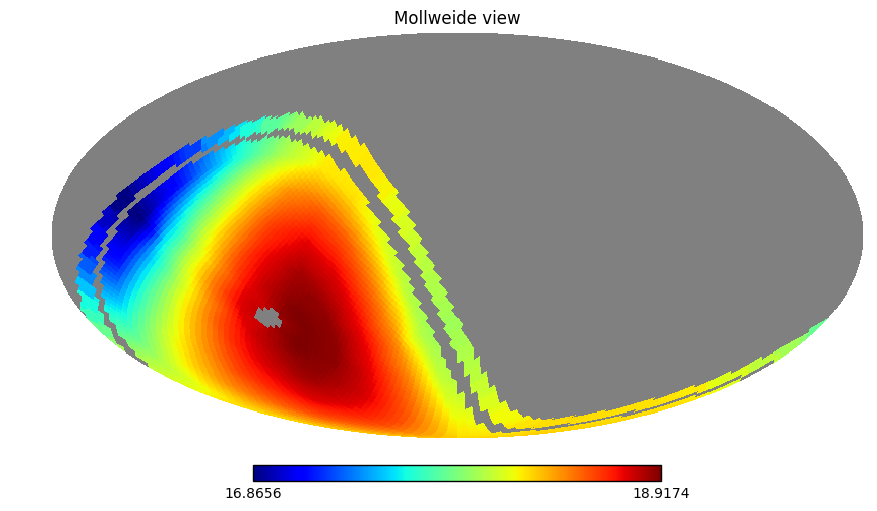

In [17]:
extend_mags = mags['r'].copy()
extend_mags[good] = outliers['r']
hp.mollview(extend_mags)

In [18]:
left = np.searchsorted(sm.info['mjds'], mjd)-1
right = left+1

In [19]:
nside = hp.npix2nside(mags['z'].size)
lat, ra = hp.pix2ang(nside, np.arange(mags['z'].size))
dec = np.pi/2-lat

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:252: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/numpy/ma/core.py:2296: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:997: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


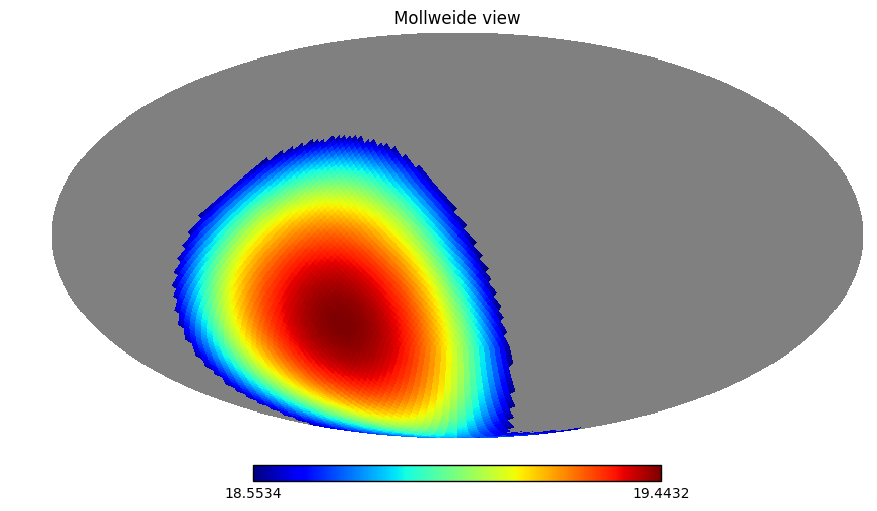

In [20]:
hp.mollview(sm.sb['z'][10,:])

In [21]:
sm2 = sb1.SkyModel(observatory='LSST', mags=True)
sm2.setRaDecMjd(ra,dec,mjd)

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


In [22]:
mags = sm2.returnMags()

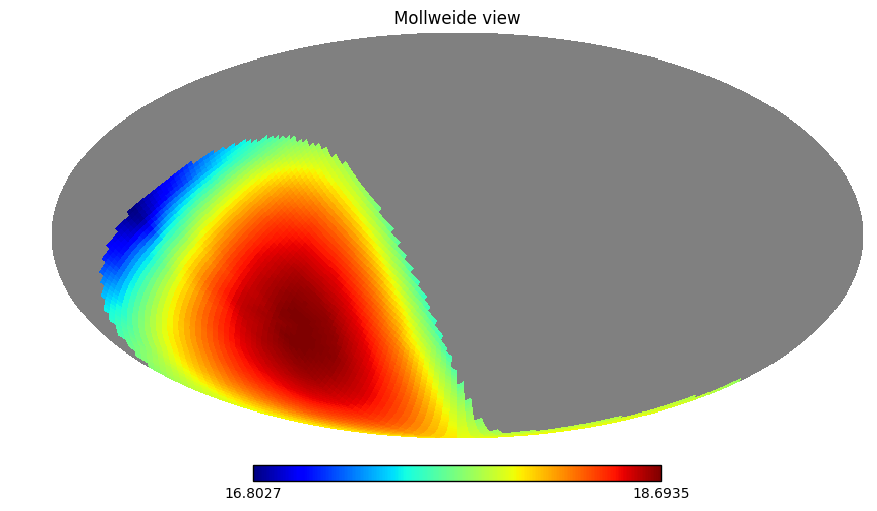

In [23]:
hp.mollview(mags['z'])

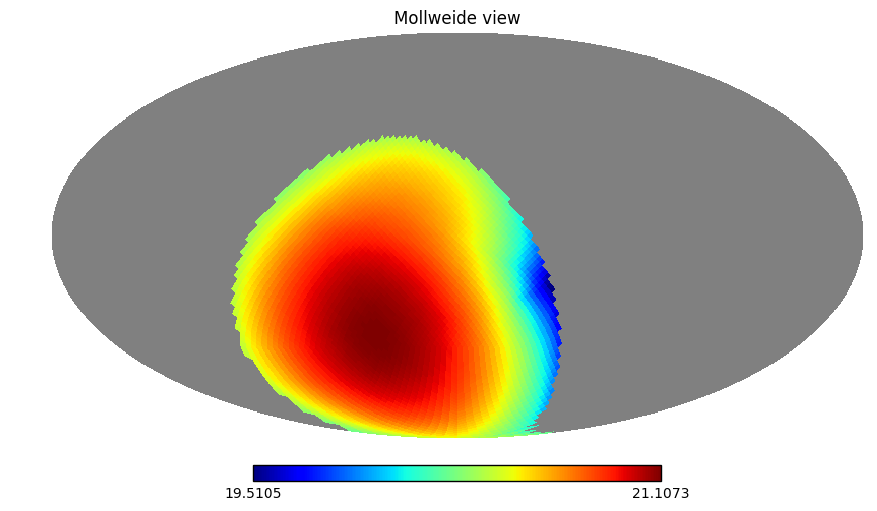

In [24]:

hp.mollview(sm.sb['r'][100,:])

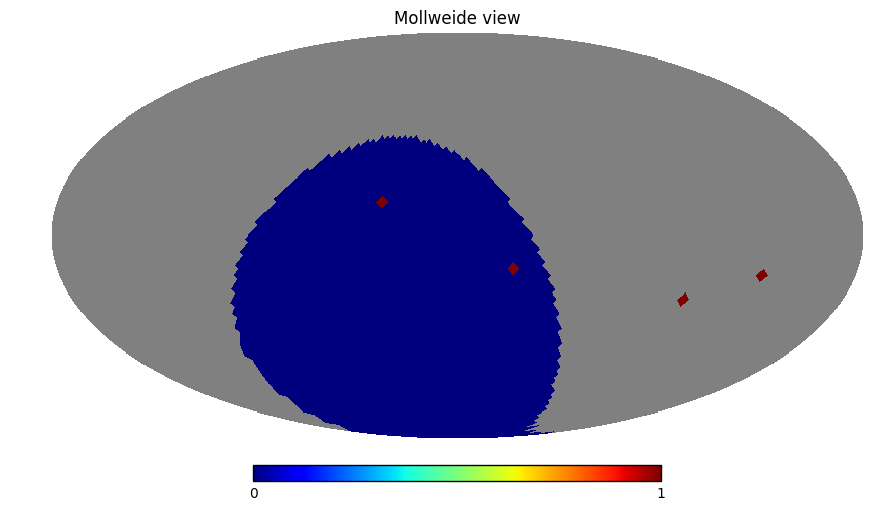

In [25]:
sm.info['planet_masks'][100,:]
ack = sm.sb['r'][100,:]*0
ack[np.where(sm.info['planet_masks'][100,:])] = 1
hp.mollview(ack)


In [26]:
sky1 = sm.returnMags(sm.info['mjds'][100])
sky2 = sm.returnMags(sm.info['mjds'][100], planet_mask=False)

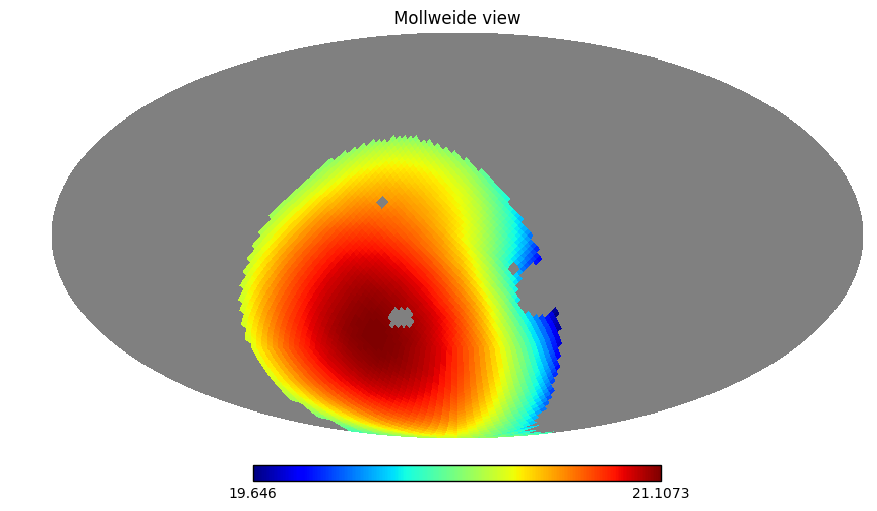

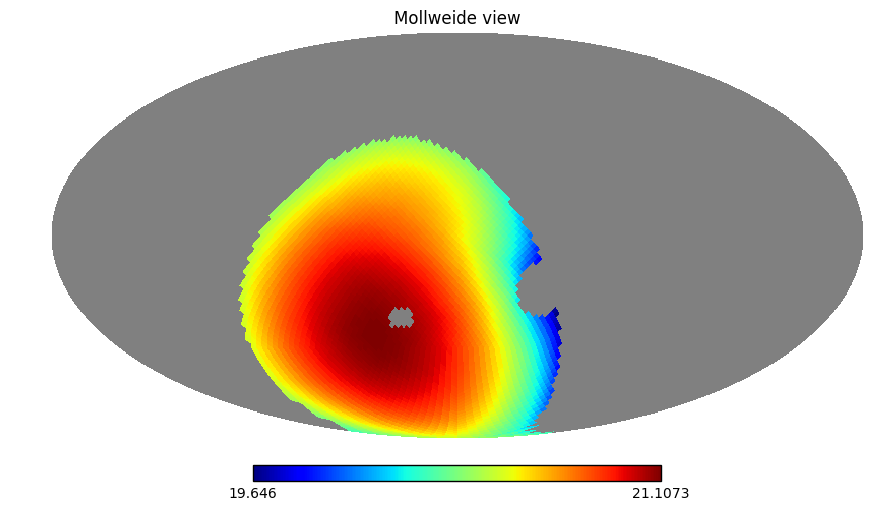

In [27]:
hp.mollview(sky1['r'])
hp.mollview(sky2['r'])